In [16]:
#!g1.1
import torch
from torch import nn as nn

%load_ext autoreload
%autoreload 2

from dcgan import DCDiscriminator, DCGenerator

In [17]:
#!g1.1
D = DCDiscriminator()
G = DCGenerator()
x = torch.randn(5, 3, 64, 64)
y = D(x)
assert (y.shape == (5, 1, 1, 1)), y.shape

x = torch.randn(5, 100)
y = G(x)
assert (y.shape == (5, 3, 64, 64)), y.shape

In [18]:
#!g1.1
sum(p.numel() for p in D.parameters() if p.requires_grad)

11038081

In [19]:
#!g1.1
sum(p.numel() for p in G.parameters() if p.requires_grad)

12660355

In [20]:
#!g1.1
from torch.utils.data import DataLoader
class InfiniteDataLoader(DataLoader):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        # Initialize an iterator over the dataset.
        self.dataset_iterator = super().__iter__()

    def __iter__(self):
        return self

    def __next__(self):
        try:
            batch = next(self.dataset_iterator)
        except StopIteration:
            # Dataset exhausted, use a new fresh iterator.
            self.dataset_iterator = super().__iter__()
            batch = next(self.dataset_iterator)
        return batch

In [21]:
#!g1.1
from torch.utils.data import Dataset
import os
from PIL import Image

class AnimeFacesDataset(Dataset):
    def __init__(self, root, files, transform):
        super().__init__()
        self.root = root
        self.files = files
        self.transform = transform
    
    def __len__(self):
        return len(self.files)
    
    def __getitem__(self, idx):
        image_name = os.path.join(self.root, self.files[idx])
        return self.transform(Image.open(image_name).convert("RGB"))

In [22]:
#!g1.1
import torchvision.transforms as T

images = os.listdir("data")
normalize = T.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])

train_transform = T.Compose([
    T.ToTensor(),
    normalize,
])

train_anime_dataset = AnimeFacesDataset("data", images, train_transform)
train_anime_loader = InfiniteDataLoader(
    train_anime_dataset,
    batch_size=128,
    shuffle=True,
    num_workers=2
)

In [23]:
#!g1.1
import matplotlib.pyplot as plt
for i in range(10000):
    x = train_anime_dataset[i]
    assert(x.min() >= -1 or x.max() <= 1), i
# plt.imshow(x.permute((1, 2, 0)))
# plt.show()

In [24]:
#!g1.1
import wandb

wandb.login(key="", relogin=True)
wandb.init(
    project="DL bhw-2",
    entity="kilka74",
    name="train DCGAN on AnimeFaces with image evolution",
    config={
        "batch_size":128,
        "lr":0.002,
        "discriminator_params":11038081,
        "generator_params":12660355,
        "num_steps":15000
    }
)

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /home/jupyter/.netrc
wandb: Currently logged in as: kilka74. Use `wandb login --relogin` to force relogin
wandb: wandb version 0.16.1 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.16.0
wandb: Run data is saved locally in /home/jupyter/work/resources/bhw DL2/wandb/run-20231218_102115-rv2dehjp
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run train DCGAN on AnimeFaces with image evolution
wandb: ⭐️ View project at https://wandb.ai/kilka74/DL%20bhw-2
wandb: 🚀 View run at https://wandb.ai/kilka74/DL%20bhw-2/runs/rv2dehjp


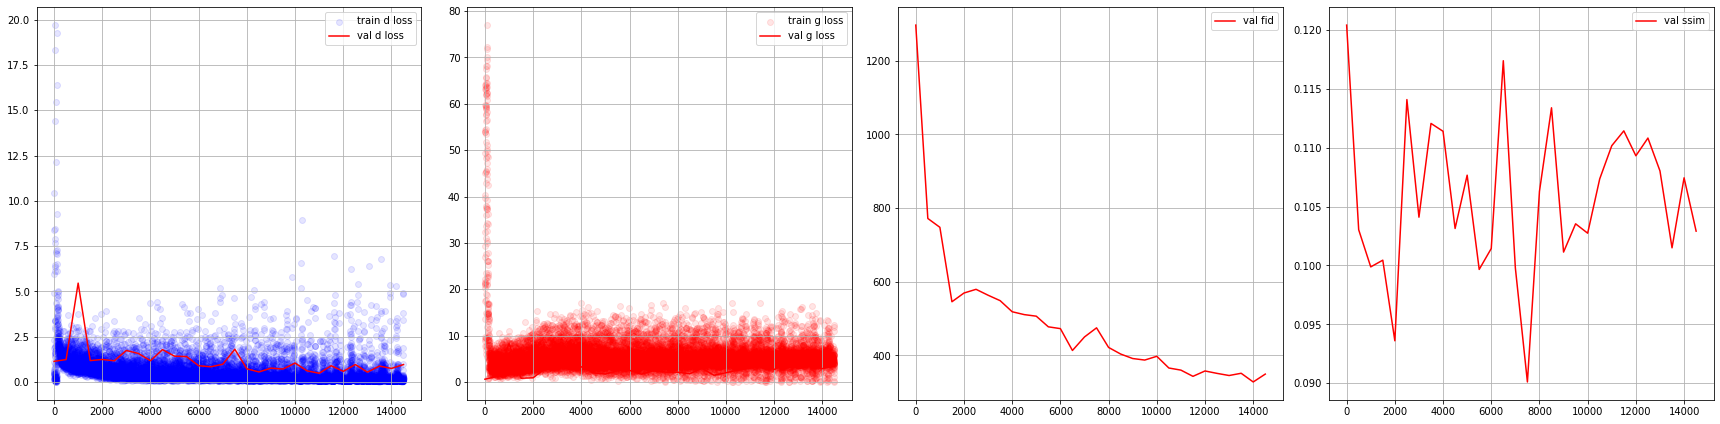

Train dcgan: 100%|██████████| 15000/15000 [1:05:37<00:00,  3.81it/s]
wandb:                                                                                
wandb: 
wandb: Run history:
wandb:         discriminator_lr ▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb:             generator_lr ▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb: train_discriminator_loss █▃▃▃▂▅▃▂▂▁▁▄▃▃▂▃▂▂▂▁▁▃▁▂▁▁▂▄▁▂▁▁▁▂▁▂▁▁▃▁
wandb:     train_generator_loss █▂▂▂▂▅▁▃▃▂▃▂▁▂▂▃▂▂▁▂▂▄▂▃▂▂▃▄▂▂▃▂▂▂▂▂▂▂▂▂
wandb:   val_discriminator_loss ▂▂█▂▂▂▃▃▂▃▂▂▂▂▂▃▁▁▁▁▂▁▁▂▁▂▁▂▁▂
wandb:       val_generator_loss ▁▂█▁▁▃▆▃▃▂▂▃▃▂▃▂▂▂▃▂▂▃▃▄▃▄▃▄▃▄
wandb:           validation FID █▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▂▁▁▁▁▁▁▁▁▁
wandb:          validation SSIM █▄▃▃▂▇▄▆▆▄▅▃▄▇▃▁▅▆▄▄▄▅▆▆▅▆▅▄▅▄
wandb: 
wandb: Run summary:
wandb:         discriminator_lr 0.0002
wandb:             generator_lr 0.0002
wandb: train_discriminator_loss 0.06996
wandb:     train_generator_loss 5.28736
wandb:   val_discriminator_loss 0.96367
wandb:       val_generator_loss 3.47856
wandb:

In [34]:
#!g1.1
from train_gan import train_gan
import torch
device = torch.device("cuda:0")
discriminator = DCDiscriminator().to(device)
generator = DCGenerator().to(device)

lr = 0.0002
generator_optimizer = torch.optim.Adam(
    generator.parameters(),
    lr=lr,
    betas=(0.5, 0.999),
    weight_decay=0
)

discriminator_optimizer = torch.optim.Adam(
    discriminator.parameters(),
    lr=lr,
    betas=(0.5, 0.999),
    weight_decay=0
)

train_gan(
    discriminator=discriminator,
    optimizer_discriminator=discriminator_optimizer,
    generator=generator,
    optimizer_generator=generator_optimizer,
    train_loader=train_anime_loader,
    noise_dim=100,
    num_steps=15000,
    eval_freq=500,
    device=torch.device("cuda:0"),
    wandb_log=True
)
wandb.finish()